In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout,Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
label_file = '../data/p3/data/driving_log.csv'
data_dir = '../data/p3/data/'
#data = pd.read_csv(label_file)[['center','steering']]
data = pd.read_csv(label_file)[['center','left','right','steering']]

In [13]:
pd.read_csv(label_file).steering.describe()

count    8036.000000
mean        0.004070
std         0.128840
min        -0.942695
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: steering, dtype: float64

In [3]:
# 3 samples
y_train_ = [data[data.steering==0.0].steering.iloc[0],
       data[data.steering>0.0].steering.iloc[0],
       data[data.steering<0.0].steering.iloc[0]]

X_train_ = np.array([plt.imread(data_dir+data[data.steering==0.0].center.iloc[0]),
       plt.imread(data_dir+data[data.steering>0.0].center.iloc[0]),
       plt.imread(data_dir+data[data.steering<0.0].center.iloc[0])])

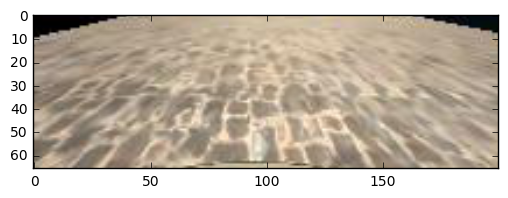

In [4]:
cpok = 20
plt.imshow(X_train_[0][94-cpok:160-cpok,60:260,:])

In [3]:
y_train = np.asarray(data.steering)
y_train.shape

(8036,)

In [6]:
arr_size = len(y_train)
X_train=np.empty((arr_size,66,220,3))
for i, url in enumerate(data.center):
    X_train[i] = plt.imread(data_dir + url)[74:74+66,50:270,:]

In [5]:
len(data)

8036

In [3]:
# choose left image is turn to the right, etc.
#arr_size = len(data[data.steering>0]) + len (data[data.steering<0])
arr_size = 6*len(data[data.steering!=0])+len(data[data.steering==0])
X_train=np.empty((arr_size,66,220,3))
y_train=np.empty((arr_size))

koef=1.1

for i,val in enumerate(data[data.steering!=0].iterrows()):        
        X_train[6*i] = plt.imread(data_dir + val[1].center.strip())[74:74+66,50:270,:]
        y_train[6*i] = val[1].steering

        X_train[6*i+1] = X_train[2*i][:,::-1]
        y_train[6*i+1] = -1*y_train[2*i]

        if val[1].steering>0:
            X_train[6*i+2] = plt.imread(data_dir + val[1].left.strip())[74:74+66,50:270,:]
            y_train[6*i+2] = val[1].steering*koef

            X_train[6*i+3] = plt.imread(data_dir + val[1].right.strip())[74:74+66,50:270,:]
            y_train[6*i+3] = val[1].steering/koef

            X_train[6*i+4] = X_train[6*i+2][:,::-1]
            y_train[6*i+4] = y_train[6*i+2]*-1

            X_train[6*i+5] = X_train[6*i+3][:,::-1]
            y_train[6*i+5] = y_train[6*i+3]*-1
        else:
            X_train[6*i+2] = plt.imread(data_dir + val[1].left.strip())[74:74+66,50:270,:]
            y_train[6*i+2] = val[1].steering/koef

            X_train[6*i+3] = plt.imread(data_dir + val[1].right.strip())[74:74+66,50:270,:]
            y_train[6*i+3] = val[1].steering*koef

            X_train[6*i+4] = X_train[6*i+2][:,::-1]
            y_train[6*i+4] = y_train[6*i+2]*-1

            X_train[6*i+5] = X_train[6*i+3][:,::-1]
            y_train[6*i+5] = y_train[6*i+3]*-1
        
        
for i,val in enumerate(data[data.steering==0].iterrows()):
        X_train[i + 6*len(data[data.steering!=0])] = plt.imread(data_dir + val[1].center.strip())[74:74+66,50:270,:]
        y_train[i + 6*len(data[data.steering!=0])] = 0.0
        
      
        
        
        
        

(array([  1.30000000e+01,   2.80000000e+01,   2.37000000e+02,
          1.96100000e+03,   9.04900000e+03,   1.29910000e+04,
          1.86400000e+03,   2.31000000e+02,   2.60000000e+01,
          1.10000000e+01]),
 array([-1.1 , -0.88, -0.66, -0.44, -0.22,  0.  ,  0.22,  0.44,  0.66,
         0.88,  1.1 ]),
 <a list of 10 Patch objects>)

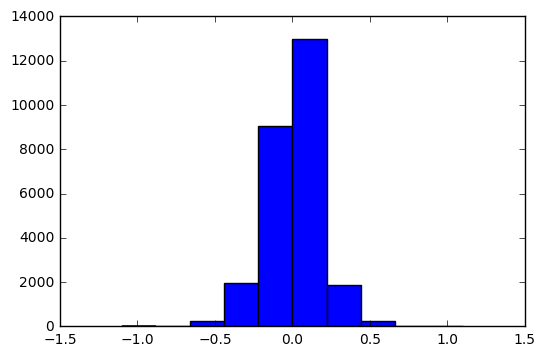

In [4]:
plt.hist(y_train)

In [9]:
# choose left image is turn to the right, etc.
arr_size = len(data[data.steering>0]) + len (data[data.steering<0])
X_train=np.empty((2*arr_size,66,220,3))
y_train=np.empty((2*arr_size))

for i,val in enumerate(data[data.steering!=0].iterrows()):

    if val[1].steering == 0:
#        X_train[2*i] = plt.imread(data_dir + val[1].left.strip())[74:74+66,50:270,:]
#        y_train[2*i] = val[1].steering
#        X_train[2*i+1] = plt.imread(data_dir + val[1].right.strip())[74:74+66,50:270,:]
#        y_train[2*i+1] = val[1].steering
        pass
    elif val[1].steering > 0:
        X_train[2*i] = plt.imread(data_dir + val[1].left.strip())[74:74+66,50:270,:]
        y_train[2*i] = val[1].steering
        X_train[2*i+1] = plt.imread(data_dir + val[1].right.strip())[74:74+66,50:270,:]
        y_train[2*i+1] = val[1].steering*(-1)
    else:
        X_train[2*i] = plt.imread(data_dir + val[1].right.strip())[74:74+66,50:270,:]
        y_train[2*i] = val[1].steering
        X_train[2*i+1] = plt.imread(data_dir + val[1].left.strip())[74:74+66,50:270,:]
        y_train[2*i+1] = val[1].steering * (-1)

In [3]:
# choose left image is turn to the right, etc.
arr_size = len(data)
X_train=np.empty((3*arr_size,66,220,3))
y_train=np.empty((3*arr_size))

min_angle = 0.05
koef_angle = 1.5

for i,val in enumerate(data.iterrows()):

    if val[1].steering == 0:
        X_train[3*i] = plt.imread(data_dir + val[1].left.strip())[74:74+66,50:270,:]
        y_train[3*i] = min_angle
        X_train[3*i+1] = plt.imread(data_dir + val[1].right.strip())[74:74+66,50:270,:]
        y_train[3*i+1] = -1*min_angle
        X_train[3*i+2] = plt.imread(data_dir + val[1].center.strip())[74:74+66,50:270,:]
        y_train[3*i+2] = val[1].steering

    elif val[1].steering > 0:
        X_train[3*i] = plt.imread(data_dir + val[1].left.strip())[74:74+66,50:270,:]
        y_train[3*i] = val[1].steering * koef_angle
        X_train[3*i+1] = plt.imread(data_dir + val[1].right.strip())[74:74+66,50:270,:]
        y_train[3*i+1] = val[1].steering / koef_angle
        X_train[3*i+2] = plt.imread(data_dir + val[1].center.strip())[74:74+66,50:270,:]
        y_train[3*i+2] = val[1].steering

    else:
        X_train[3*i] = plt.imread(data_dir + val[1].right.strip())[74:74+66,50:270,:]
        y_train[3*i] = val[1].steering * koef_angle
        X_train[3*i+1] = plt.imread(data_dir + val[1].left.strip())[74:74+66,50:270,:]
        y_train[3*i+1] = val[1].steering / koef_angle
        X_train[3*i+2] = plt.imread(data_dir + val[1].center.strip())[74:74+66,50:270,:]
        y_train[3*i+2] = val[1].steering

(array([  2.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          5.00000000e+00,   5.00000000e+00,   4.00000000e+00,
          5.00000000e+00,   1.40000000e+01,   1.70000000e+01,
          3.20000000e+01,   6.80000000e+01,   1.20000000e+02,
          2.52000000e+02,   3.61000000e+02,   6.08000000e+02,
          7.40000000e+02,   1.61100000e+03,   2.31700000e+03,
          3.07100000e+03,   2.05000000e+03,   1.97200000e+03,
          2.84800000e+03,   2.07300000e+03,   1.73700000e+03,
          7.00000000e+02,   5.52000000e+02,   3.87000000e+02,
          2.25000000e+02,   1.24000000e+02,   5.40000000e+01,
          3.40000000e+01,   1.90000000e+01,   1.40000000e+01,
          5.00000000e+00,   2.00000000e+00,   5.00000000e+00,
          3.00000000e+00,   0.00000000e+00,   6.00000000e+00,
          2.00000000e+00]),
 array([-1.1  , -1.045, -0.99 , -0.935, -0.88 , -0.825, -0.77 , -0.715,
        -0.66 , -0.605, -0.55 , -0.495, -0.44 , -0.385, -0.33 , -0.275,
        -0.22 , -0.165

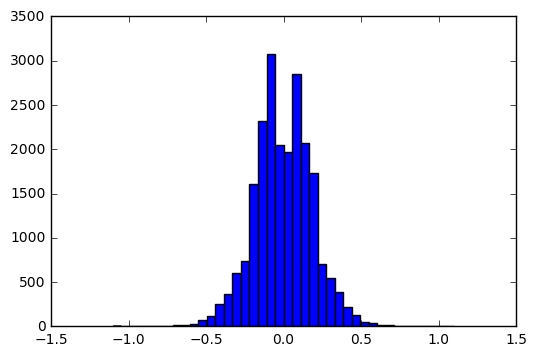

In [5]:
plt.hist(y_train,bins=40)

In [22]:
# choose left image is turn to the right, etc.
arr_size = len(y_train)
X_train=np.empty((arr_size,66,220,3))
for i in range(arr_size):
    row = next(data.iterrows())[1]
    if row.steering == 0:
        X_train[i] = plt.imread(data_dir + row.center)[74:74+66,50:270,:]
    elif row.steering < 0:
        X_train[i] = plt.imread(data_dir + row.left)[74:74+66,50:270,:]
    else:
        X_train[i] = plt.imread(data_dir + row.right)[74:74+66,50:270,:]

In [23]:
count = [data.steering[data.steering<0].count(), data.steering[data.steering==0].count(),
         data.steering[data.steering>0].count()]
count

[1775, 4361, 1900]

In [14]:
X_train.shape

(8036, 66, 220, 3)

In [35]:
model = Sequential()
#input 320*160*3 output 160*80*64
model.add(Convolution2D(64, 7, 7, subsample = (2,2), input_shape=(80,240,3)))
#output 80*40*64
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#output 80*40*192
model.add(Convolution2D(192, 3, 3, subsample = (1,1)))
#output 40*20*192
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

model.add(Dropout(0.4))
model.add(Activation('relu'))
# output 153600
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')





model.fit(np.asarray(X_train), np.asarray(y_train), nb_epoch=5, batch_size=32)
#score = model.evaluate(X_test, y_test, batch_size=32)
#score



Epoch 1/5
8036/8036 [==============================] - 120s - loss: 29973.7559   
Epoch 2/5
8036/8036 [==============================] - 119s - loss: 0.0167   
Epoch 3/5
8036/8036 [==============================] - 119s - loss: 0.0167   
Epoch 4/5
8036/8036 [==============================] - 122s - loss: 0.0167   
Epoch 5/5
8036/8036 [==============================] - 122s - loss: 0.0167   


In [36]:
# save as JSON
json_string = model.to_json()
# serialize weights to HDF5
model.save_weights("model.h5")

with open("model.json", "w") as json_file:
    json_file.write(json_string)


print("Saved model to disk")

Saved model to disk


In [4]:
n = 10
for i in range(n):
    X_train[i*arr_size/n:(i+1)*arr_size/n] = (X_train[i*arr_size/n:(i+1)*arr_size/n]-128)/128

/home/carnd/anaconda3/envs/carnd/lib/python3.5/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [8]:
X_train[2*arr_size:4*arr_size] = (X_train[2*arr_size:4*arr_size] - 128)/128

In [9]:
X_train[4*arr_size:] = (X_train[4*arr_size:]-128)/128

In [6]:
#norm X_train
#X_train = (X_train - 128)/128

akt = 'relu'
init = 'he_normal'
model = Sequential()
model.add(Lambda(lambda x: x/128 - 1., input_shape=(66, 220, 3), output_shape=(66, 220, 3)))
model.add(Convolution2D(24, 5, 5, subsample = (2, 2), input_shape=(66, 220, 3),
                        border_mode='valid',activation=akt, init=init))
model.add(Convolution2D(36, 5, 5, subsample = (2, 2), border_mode='valid',activation=akt, init=init))
model.add(Convolution2D(48, 5, 5, subsample = (2, 2), border_mode='valid',activation=akt, init=init))
model.add(Convolution2D(64, 3, 3, subsample = (1, 1), border_mode='valid',activation=akt, init=init))
model.add(Convolution2D(64, 3, 3, subsample = (1, 1), border_mode='valid',activation=akt, init=init))


model.add(Flatten())
model.add(Dense(100,activation=akt, init=init))
model.add(Dense(50, activation=akt, init=init))
model.add(Dense(10, activation=akt, init=init))
model.add(Dense(1, init=init))

model.compile(loss='mean_squared_error', optimizer='adam')


from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

model.fit(np.asarray(X_train), np.asarray(y_train), nb_epoch=10, batch_size=32, validation_split=0.2,
          callbacks=[early_stopping])



Train on 21128 samples, validate on 5283 samples
Epoch 1/10
21128/21128 [==============================] - 120s - loss: 0.0173 - val_loss: 0.0081
Epoch 2/10
21128/21128 [==============================] - 119s - loss: 0.0145 - val_loss: 0.0134
Epoch 3/10
21128/21128 [==============================] - 120s - loss: 0.0138 - val_loss: 0.0120
Epoch 4/10
21128/21128 [==============================] - 119s - loss: 0.0130 - val_loss: 0.0124


In [11]:
json_string = model.to_json()
model.save_weights("model.h5")

with open("model.json", "w") as json_file:
    json_file.write(json_string)
print("Saved model to disk")

Saved model to disk


In [42]:
y_train

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])